In [47]:
data = pd.read_csv("C:\\Users\\USER\\Downloads\\20230430.csv", encoding='cp949')

data['등록일'] = pd.to_datetime(data['등록일'])

yearly_counts = data.groupby(data['등록일'].dt.year)['중개업소명'].count()

In [48]:
data['시군구명'] = data['시군구명'].str.replace('대구광역시 ', '')

yearly_counts = data.groupby(data['등록일'].dt.year).size()

district_counts = data['시군구명'].value_counts()

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fonts = [font.name for font in fm.fontManager.ttflist]

nanum_font = [font for font in fonts if 'Nanum' in font]

if nanum_font:
    plt.rcParams['font.family'] = 'NanumGothic'
else:
    plt.rcParams['font.family'] = fonts[0]

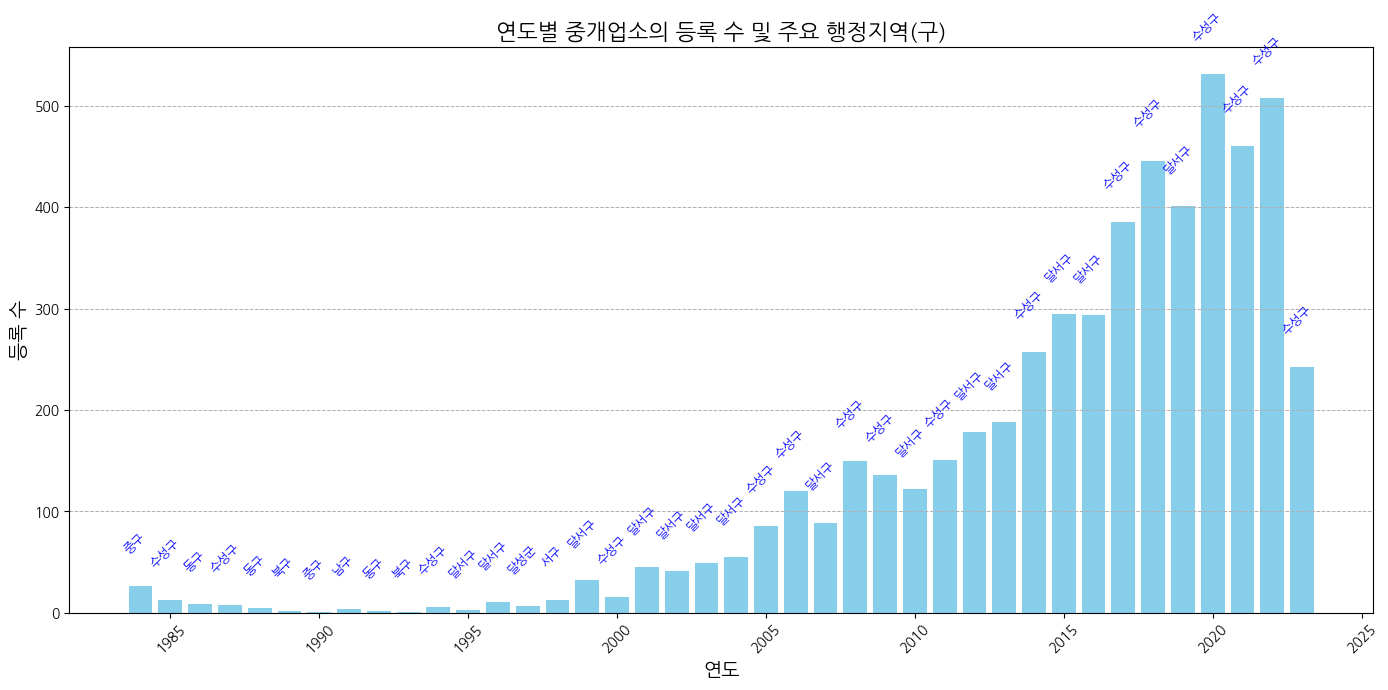

In [50]:
top_district_by_year = data.groupby([data['등록일'].dt.year, '시군구명']).size().unstack().idxmax(axis=1)

plt.figure(figsize=(14, 7))
bars = plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

for bar, district in zip(bars, top_district_by_year):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, 
             bar.get_height() + 30, 
             district, 
             ha='center', 
             va='bottom',
             fontsize=9, 
             rotation=45, 
             color='blue')

plt.title('연도별 중개업소의 등록 수 및 주요 행정지역(구)', fontsize=16)
plt.xlabel('연도', fontsize=14)
plt.ylabel('등록 수', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

plt.show()

In [51]:
yearly_registration = data['등록일'].dt.year.value_counts().sort_index()

business_status_distribution = data['영업상태'].value_counts()

In [52]:
from IPython.display import display

print("1. 각 연도별 등록신청 수:")
display(yearly_registration.to_frame())

print("\n2. 영업 상태별 분포:")
display(business_status_distribution.to_frame())

1. 각 연도별 등록신청 수:


,등록일
1984,26
1985,13
1986,9
1987,8
1988,5
1989,2
1990,1
1991,4
1992,2
1993,1



2. 영업 상태별 분포:


,영업상태
영업중,5347
휴업,37
휴업연장,2
업무정지,2
